## Data Preprocessing

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [45]:
data = pd.read_csv('docs/anxiety_attack_dataset.csv')
data=data.drop(columns=["ID"])
# There are not duplicated rows in the dataset
data.duplicated().value_counts()
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")

Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
False    12000
Name: count, dtype: int64
 
Recen

###### Homogeneous preprocessing


Class distribution for 'Dizziness':
Dizziness
0    70.05
1    29.95
Name: proportion, dtype: float64


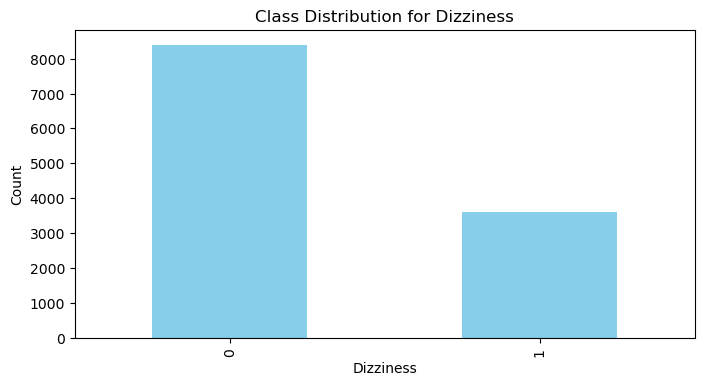


Class distribution for 'Medication':
Medication
0    80.041667
1    19.958333
Name: proportion, dtype: float64


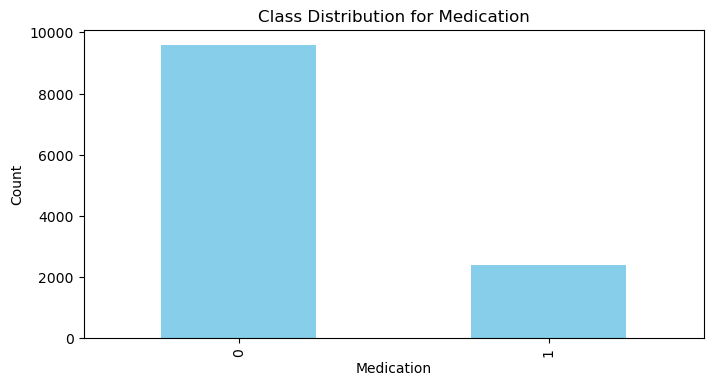


Class distribution for 'Smoking':
Smoking
0    70.141667
1    29.858333
Name: proportion, dtype: float64


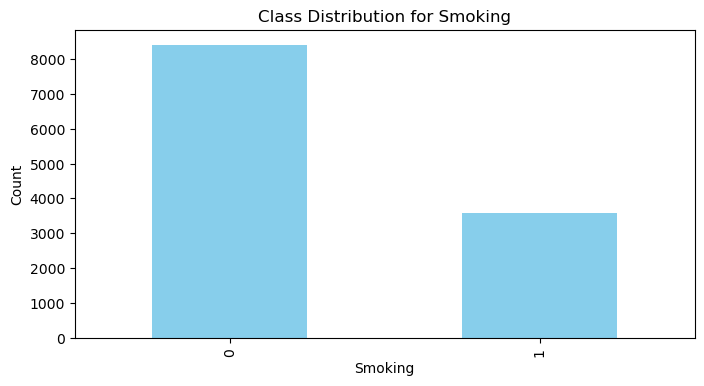


Class distribution for 'Recent Major Life Event':
Recent Major Life Event
0    75.45
1    24.55
Name: proportion, dtype: float64


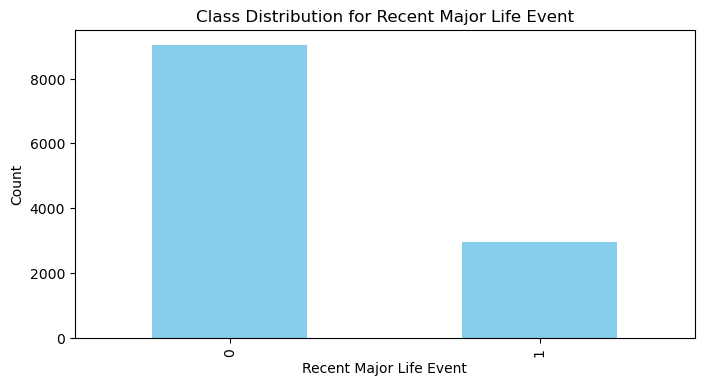


Class distribution for 'Family History of Anxiety':
Family History of Anxiety
0    59.825
1    40.175
Name: proportion, dtype: float64


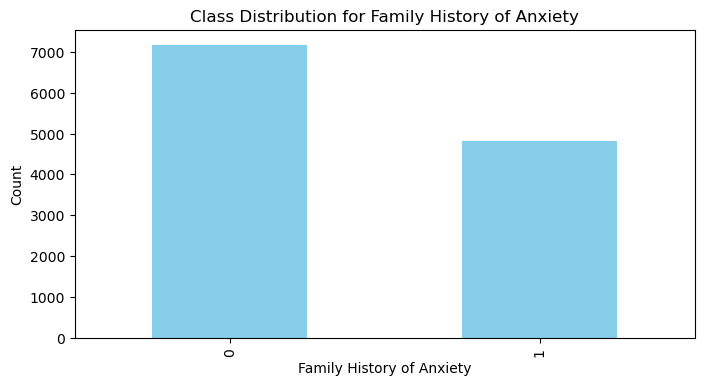


Class distribution for 'Occupation':
Occupation
Unemployed    17.825
Doctor        16.700
Teacher       16.500
Other         16.425
Student       16.275
Engineer      16.275
Name: proportion, dtype: float64


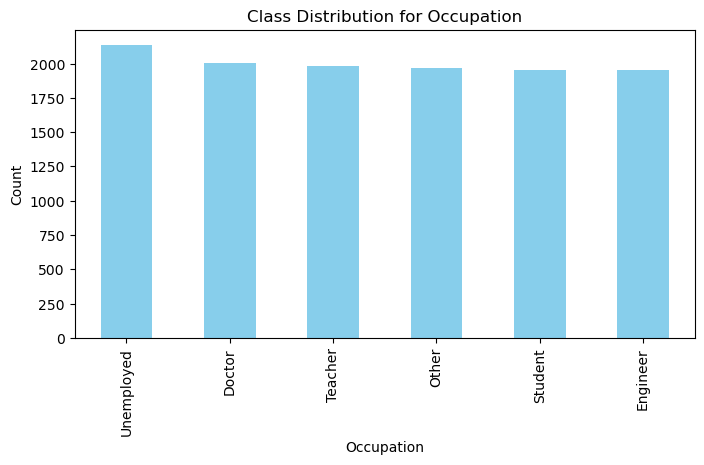


Class distribution for 'Gender':
Gender
Female    48.408333
Male      47.691667
Other      3.900000
Name: proportion, dtype: float64


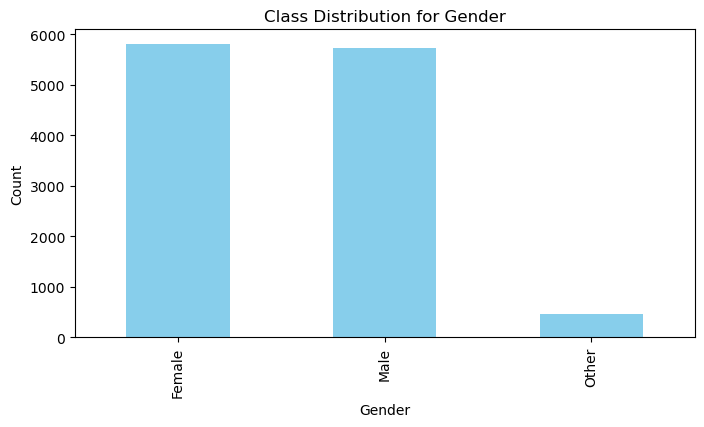

In [46]:
# 1. Handle Binary Categorical Variables
binary_cols = ['Dizziness', 'Medication', 'Smoking', 'Recent Major Life Event', "Family History of Anxiety"]
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
    
# Check class distribution for each categorical variable
categorical_cols= binary_cols+['Occupation']+['Gender']
for col in categorical_cols:
    print(f"\nClass distribution for '{col}':")
    class_counts = data[col].value_counts(normalize=True) * 100  # Percentage distribution
    print(class_counts)
    # Plot class distribution
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Class Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
# 2. One-Hot Encoding for Multi-Class Categorical Variables
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(data[['Occupation']])
encoded_df = pd.DataFrame(
    encoded_cols.toarray(),  # Explicitly convert to dense array
    columns=encoder.get_feature_names_out(['Occupation'])
)
data = pd.concat([data.drop(['Occupation'], axis=1), encoded_df], axis=1)

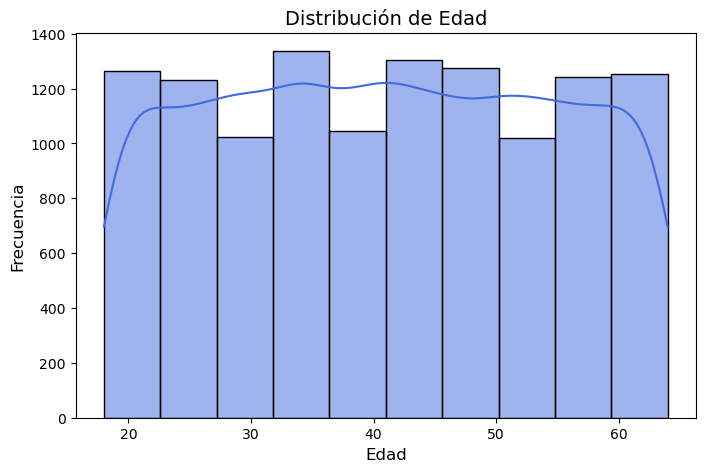

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True, color='royalblue')

plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de Edad", fontsize=14)
plt.show()

In [48]:
"""Age = data['Age']
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70']

# Create age groups
groups = pd.cut(Age, bins=bins, labels=labels)

# Count occurrences in each group
group_counts = groups.value_counts().sort_index()

# Display group counts
print(group_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(group_counts.index, group_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()

# One hot-encoding keeping the grouped column for visualization
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(groups.to_frame())
data = pd.concat([data.drop(['Age'], axis=1), array], axis=1)"""

Gender = data['Gender']
# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(data[['Gender']])
data = pd.concat([data.drop(['Gender'], axis=1), array], axis=1)
data.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),...,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Occupation_Engineer,Occupation_Other,Occupation_Student,Occupation_Teacher,Occupation_Unemployed,Gender_Female,Gender_Male,Gender_Other
0,56,9.6,8.3,175,6,0,0,4,145,33,...,9,10,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,46,6.4,7.3,97,6,0,0,3,143,18,...,9,8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,6.9,1.0,467,14,0,0,2,60,34,...,10,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60,9.2,3.7,471,16,0,1,6,94,19,...,5,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,9.2,2.5,364,2,0,1,7,152,15,...,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


 Detecting outliers and visualizing the distribution of numerical variables:

Sleep Hours: 0 outliers detected


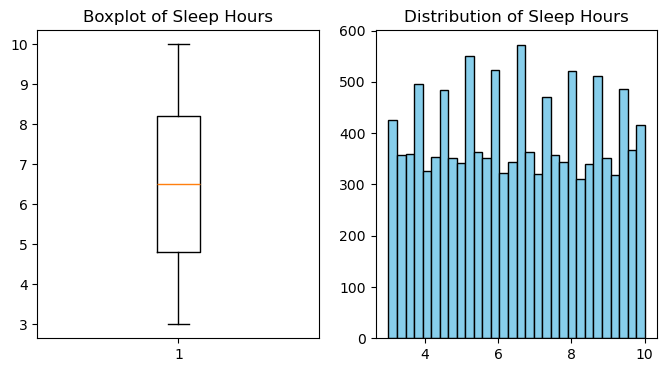

Physical Activity (hrs/week): 0 outliers detected


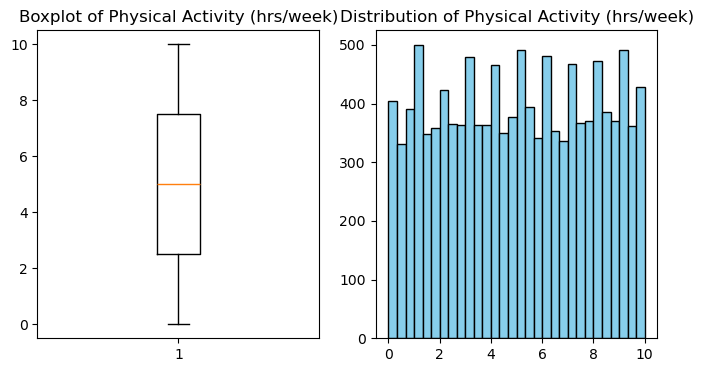

Caffeine Intake (mg/day): 0 outliers detected


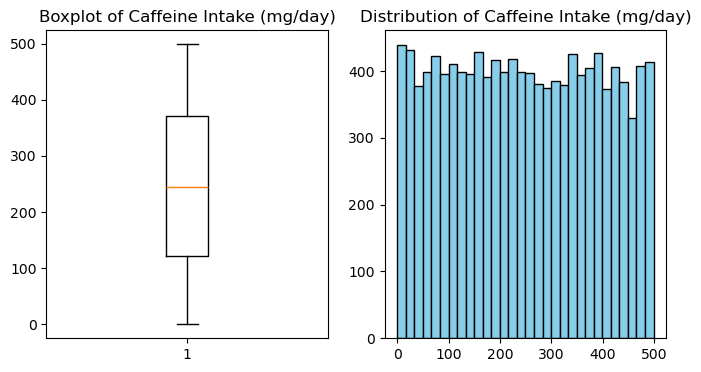

Alcohol Consumption (drinks/week): 0 outliers detected


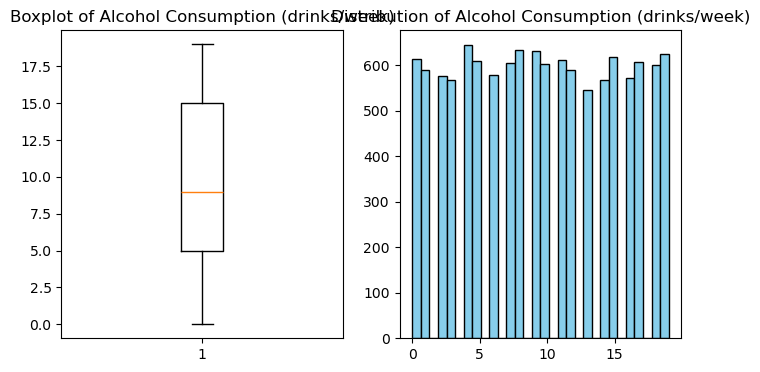

Therapy Sessions (per month): 0 outliers detected


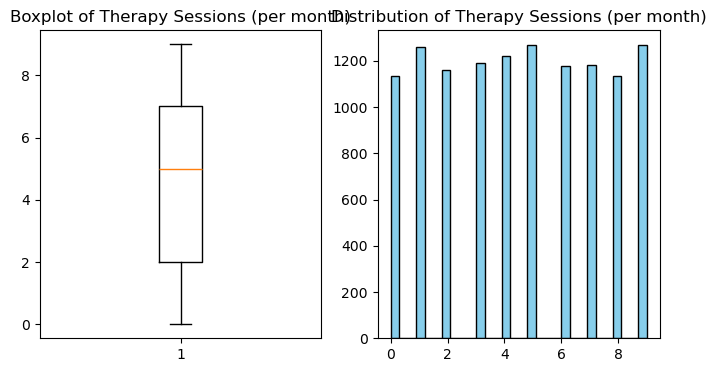

Diet Quality (1-10): 0 outliers detected


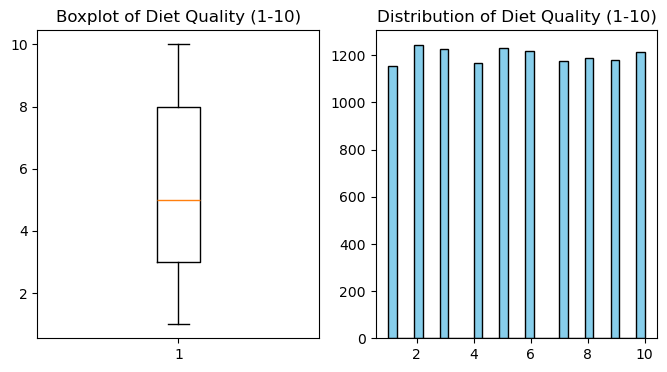

Stress Level (1-10): 0 outliers detected


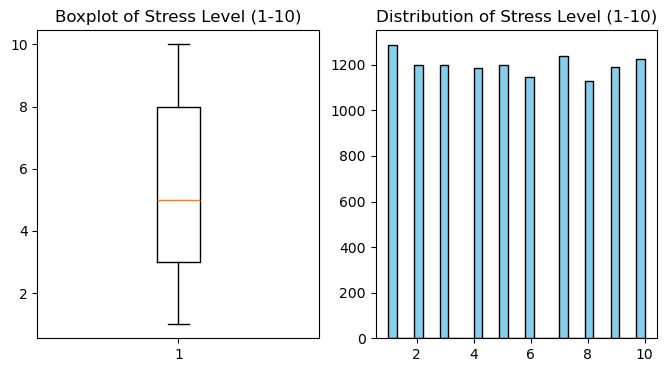

Heart Rate (bpm during attack): 0 outliers detected


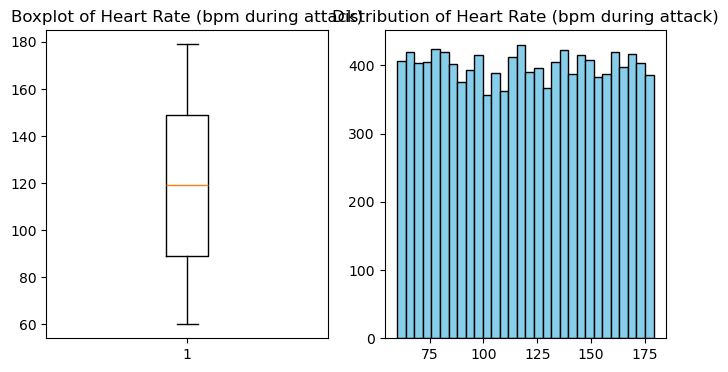

Breathing Rate (breaths/min): 0 outliers detected


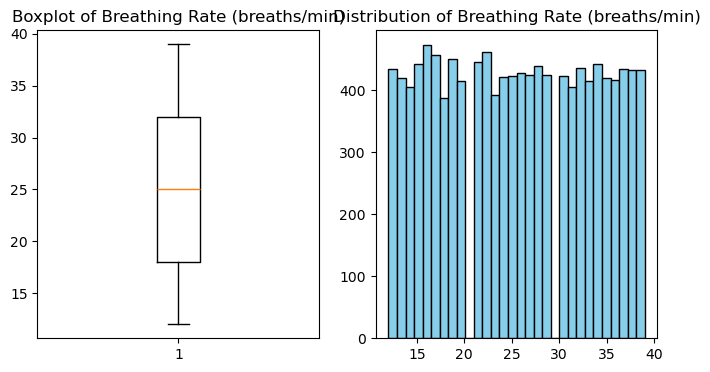

Sweating Level (1-5): 0 outliers detected


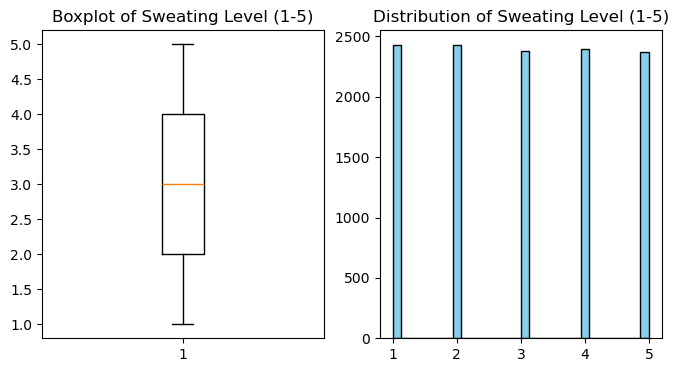

Age: 0 outliers detected


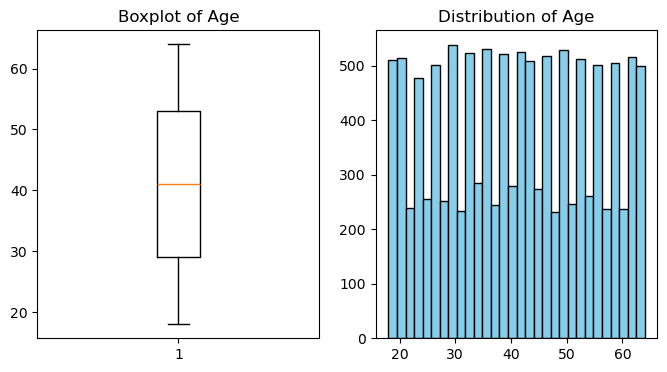


 Summary of detected outliers:
- Sleep Hours: 0 outliers
- Physical Activity (hrs/week): 0 outliers
- Caffeine Intake (mg/day): 0 outliers
- Alcohol Consumption (drinks/week): 0 outliers
- Therapy Sessions (per month): 0 outliers
- Diet Quality (1-10): 0 outliers
- Stress Level (1-10): 0 outliers
- Heart Rate (bpm during attack): 0 outliers
- Breathing Rate (breaths/min): 0 outliers
- Sweating Level (1-5): 0 outliers
- Age: 0 outliers

 Numerical variables successfully normalized.


,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),...,Diet Quality (1-10),Severity of Anxiety Attack (1-10),Occupation_Engineer,Occupation_Other,Occupation_Student,Occupation_Teacher,Occupation_Unemployed,Gender_Female,Gender_Male,Gender_Other
0,1.115829,1.547225,1.131618,-0.496232,-0.605436,0,0,-0.504732,0.735564,0.931686,...,1.221522,10,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.373588,-0.041021,0.785463,-1.036095,-0.605436,0,0,-0.849907,0.678102,-0.922375,...,1.221522,8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.665549,0.207142,-1.395313,1.524795,0.781257,0,0,-1.195082,-1.706595,1.055290,...,1.570263,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.412725,1.348694,-0.460695,1.552480,1.127930,0,1,0.185618,-0.729732,-0.798771,...,-0.173440,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.185117,1.348694,-0.876081,0.811898,-1.298782,0,1,0.530793,0.936683,-1.293187,...,-1.568403,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-0.962445,-1.033675,-0.322233,0.784213,-1.472119,1,1,-1.540258,0.563176,-0.675167,...,1.221522,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11996,0.596261,1.696123,-0.979927,1.289470,-0.952109,0,1,-0.504732,0.879221,0.931686,...,-0.173440,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11997,-1.333565,1.646490,1.062387,-0.738478,1.647940,1,0,-1.195082,-1.103238,0.931686,...,-1.568403,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11998,0.818933,-0.289185,0.543155,-0.918432,0.434584,0,0,1.221143,-0.844657,-1.416791,...,1.221522,5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
# 3. Normalize Numerical Variables
numerical_cols = [
    'Sleep Hours', 
    'Physical Activity (hrs/week)', 
    'Caffeine Intake (mg/day)', 
    'Alcohol Consumption (drinks/week)', 
    'Therapy Sessions (per month)', 
    'Diet Quality (1-10)',
    "Stress Level (1-10)",
    "Heart Rate (bpm during attack)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)",
    "Age"
]
def detect_outliers_and_normalize(data, numerical_cols):
    print(" Detecting outliers and visualizing the distribution of numerical variables:\n")

    outliers_info = {}

    for col in numerical_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        num_outliers = len(outliers)
        outliers_info[col] = num_outliers

        # Display outlier information
        print(f"{col}: {num_outliers} outliers detected")

        # Visualize the variable distribution with a boxplot
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.boxplot(data[col])
        plt.title(f'Boxplot of {col}')

        # Visualize with a histogram
        plt.subplot(1, 2, 2)
        plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')

        plt.show()

    print("\n Summary of detected outliers:")
    for col, count in outliers_info.items():
        print(f"- {col}: {count} outliers")

    # Normalize numerical variables with StandardScaler
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    print("\n Numerical variables successfully normalized.")

    return data
detect_outliers_and_normalize(data, numerical_cols)


##### data split

In [8]:
train, test =train_test_split(
    data,
    test_size=0.2,

    random_state=0,
    shuffle=True,
    stratify=data['Severity of Anxiety Attack (1-10)']
)

train_X = train.drop(columns=['Severity of Anxiety Attack (1-10)'])
train_Y = train['Severity of Anxiety Attack (1-10)']
test_X = test.drop(columns=['Severity of Anxiety Attack (1-10)'])
test_Y = test['Severity of Anxiety Attack (1-10)']

##### Feature selection

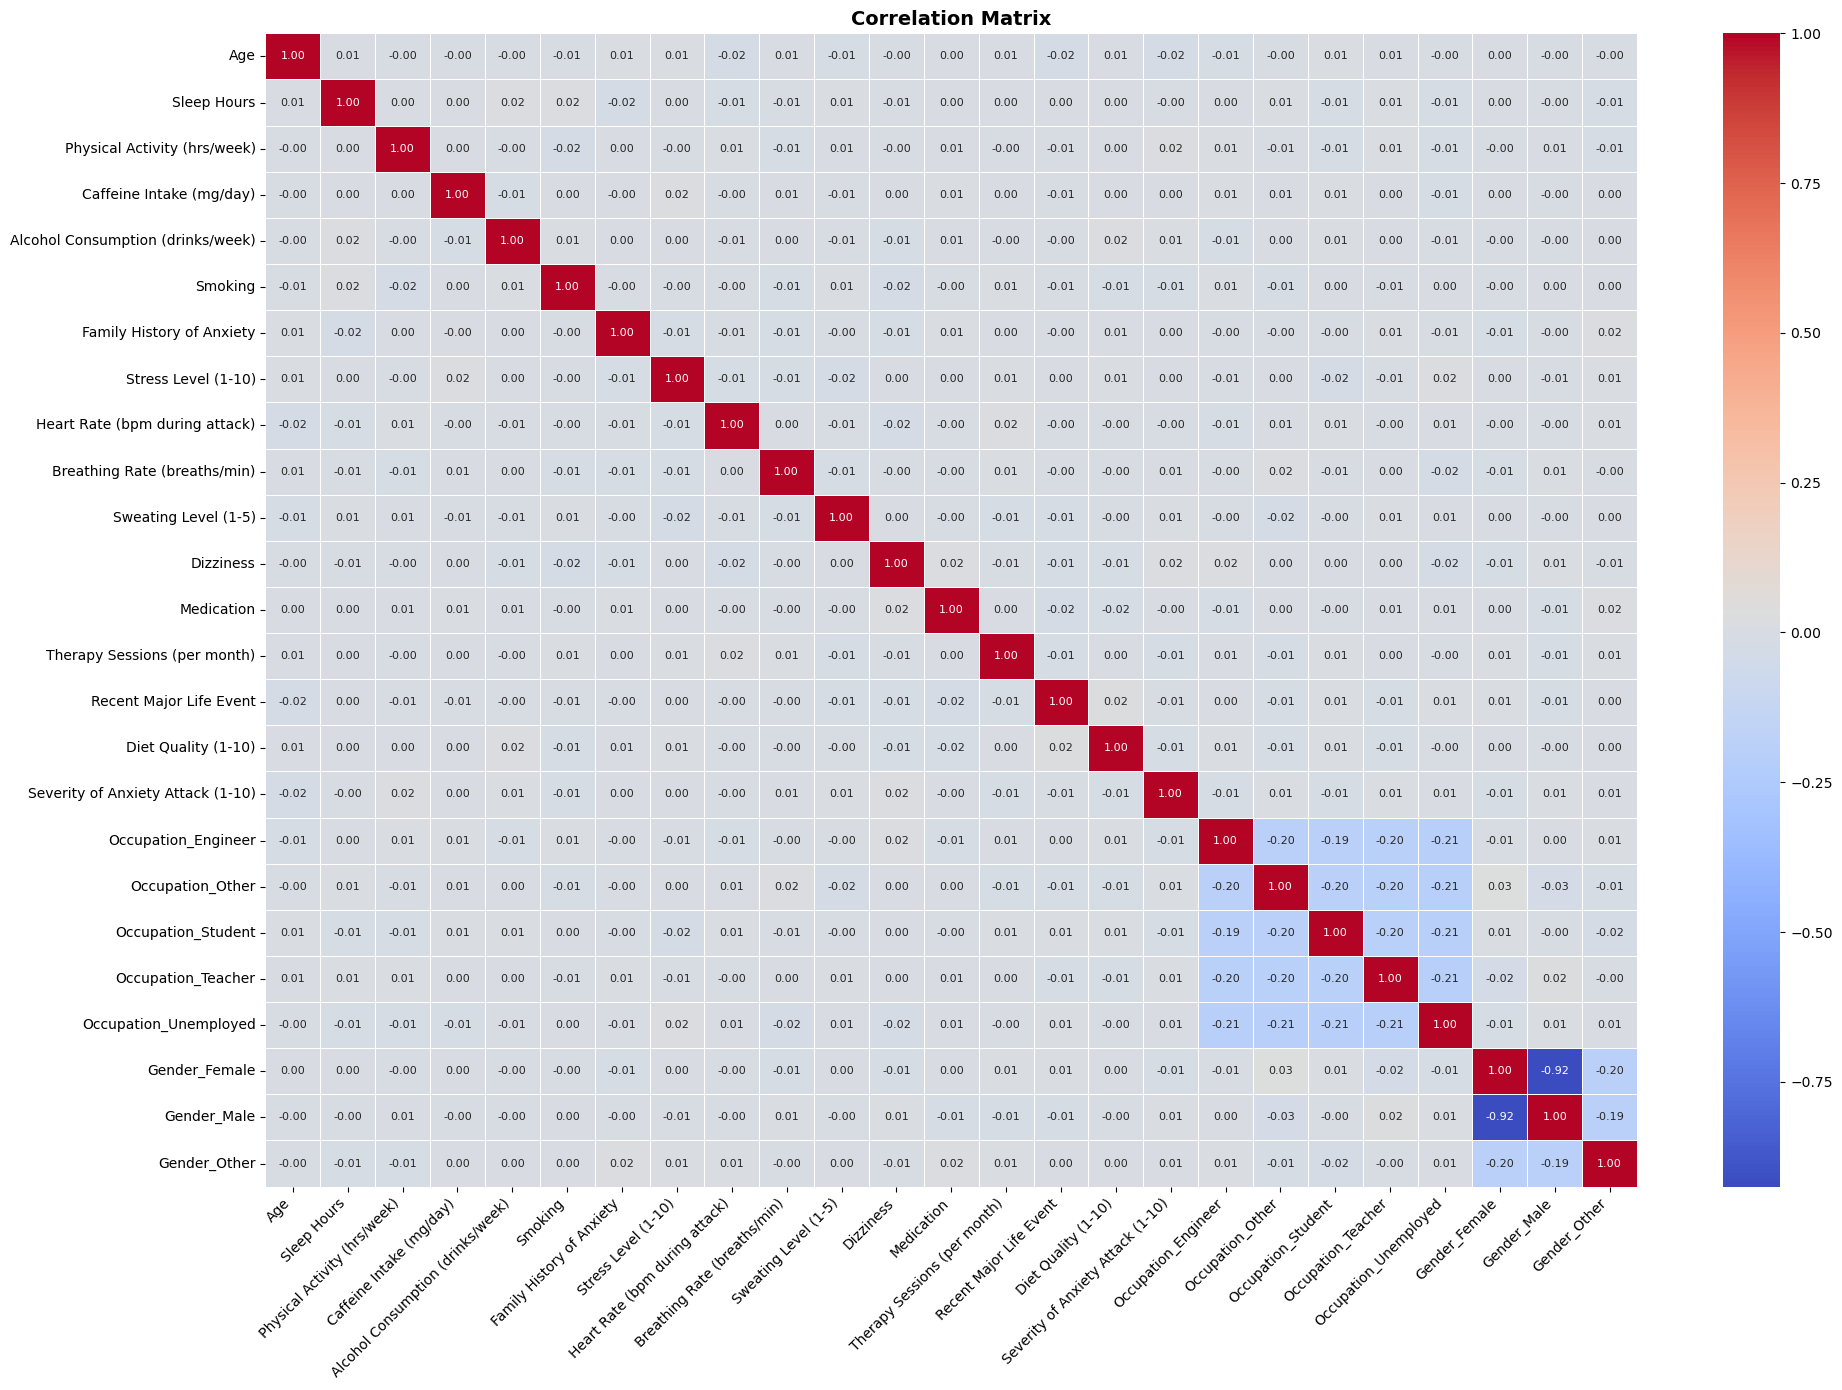

In [50]:
#calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Varianza explicada por componente:
[0.07935578 0.0788263  0.07706371 0.07674623 0.07579047 0.07562583
 0.07500518 0.07452934 0.07320202 0.07266205 0.07248911 0.03631373
 0.01816775 0.01614077 0.01557705 0.01404083 0.01315541 0.01241941
 0.01234619 0.01228205 0.01192511 0.00423764 0.00209805 0.        ]


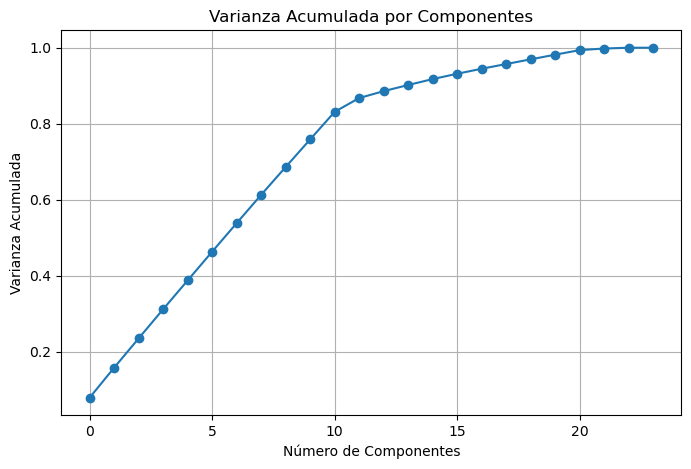

Número óptimo de componentes para explicar el 95% de la varianza: 18
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.315430  0.363597  0.684893 -0.492225 -0.143119  1.410357  1.475743   
1 -1.631621  1.511250  0.348323  0.169859 -1.427142 -0.118067  0.886827   
2  1.701273 -0.193774 -0.262593 -1.224038  1.738380 -1.257991  0.342836   
3  2.241941  0.812244 -0.309352  0.208198  0.589511 -0.009071  0.092861   
4 -1.373802  0.657607 -0.454578  1.834233  1.008870 -0.554489 -1.642157   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.770981  1.218669  0.577825 -1.094458  0.763235 -0.371793 -0.043724   
1  1.028459  0.740589  0.805366 -0.263204 -0.726956 -0.456613  0.700209   
2  1.063082  0.387738 -2.316518  0.407925  0.715010 -0.383839 -0.080430   
3 -1.242040  1.412169 -0.329148  1.047742 -0.719905  0.622258  0.030342   
4 -0.902260  1.409973  1.053790 -0.824346 -0.709514  0.668152  0.075811   

       PC15      PC16      PC

In [51]:
#PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_verdadero = data.drop(columns=['Severity of Anxiety Attack (1-10)'])
X_scaled = X_verdadero.select_dtypes(include=[np.number])
X=X_verdadero
pca = PCA(n_components=None)

# Ajustar PCA a los datos
X_pca = pca.fit_transform(X_scaled)

# Mostrar varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Varianza explicada por componente:\n{explained_variance_ratio}')

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Varianza Acumulada por Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

# Calcular varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Número de componentes que explican 95% de la varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Número óptimo de componentes para explicar el 95% de la varianza: {n_components}')

# Aplicar PCA con el número óptimo de componentes
pca_opt = PCA(n_components=n_components)
X_reduced = pca_opt.fit_transform(X_scaled)

# Convertir el resultado a DataFrame si es necesario
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print(X_reduced_df.head())

# Mostrar pesos de cada componente
loadings = pd.DataFrame(pca_opt.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(n_components)])
print(loadings)


In [39]:
# Usar X_reduced_df para modelado
X_reduced_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,0.339068,0.058573,-1.092515,0.754346,0.956294,-0.955049,0.565317,-0.383808,-1.219078,1.370989,...,-0.034070,-0.417589,-0.072620,0.269438,0.752411,-0.415215,0.673657,-0.369442,-0.309083,0.693017
1,1.898030,-1.365847,-0.482417,1.069931,-1.030141,-0.720605,0.947731,0.158919,-0.282839,0.827445,...,-0.098242,-0.523331,0.523129,0.646079,-0.695611,-0.096157,-0.264771,-0.169491,0.775505,-0.140741
2,-0.673499,1.902479,-0.231571,-2.022221,0.394688,-0.964949,1.125039,-0.055947,-1.299792,-1.829362,...,-0.023666,-0.580109,-0.730070,-0.527112,-0.177035,-0.268463,0.592666,-0.145793,0.049136,-0.014724
3,0.303654,2.023778,0.523070,-0.394260,0.421163,-0.186535,-1.174961,1.160671,-0.809549,-0.867906,...,-0.575093,0.407302,-0.222056,0.278949,0.678462,-0.302099,0.707199,-0.057112,0.215427,0.303835
4,0.895542,-0.719605,1.917611,0.404239,0.314131,0.994941,-0.572156,2.147978,-0.436561,1.343393,...,0.279363,0.929427,-0.242362,0.011949,0.028460,-0.336319,-0.351322,-0.134062,0.005959,0.225763


In [40]:
selected_features = ["Sleep Hours","Diet Quality (1-10)","Sweating Level (1-5)",'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm during attack)', "Physical Activity (hrs/week)","Breathing Rate (breaths/min)"]
X_selected = X[selected_features]

In [52]:
from sklearn.model_selection import train_test_split


y = data['Severity of Anxiety Attack (1-10)'] 

# Dividir datos para entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (9600, 18)
Tamaño del conjunto de prueba: (2400, 18)


##### Decision Tree

✅ Best max_depth: 23
📊 Best cross-validated accuracy: 0.1047


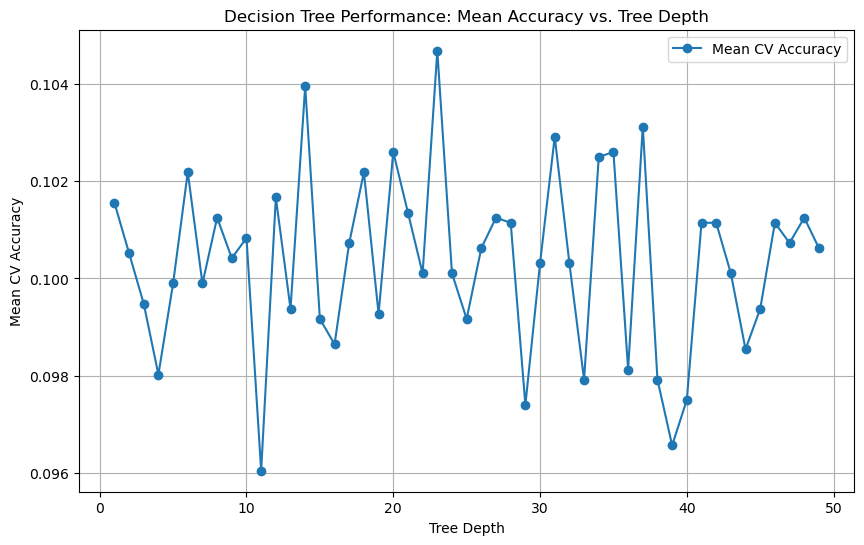

🎯 Test accuracy with max_depth=23: 0.1004


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Set up KFold Cross-Validation
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for max_depth
param_grid = {'max_depth': np.arange(1, 50)}  # Test depths from 1 to 50

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)  # Changed from train_X, train_Y to X_train, y_train

# Retrieve the best parameters and corresponding score
best_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f"✅ Best max_depth: {best_depth}")
print(f"📊 Best cross-validated accuracy: {best_score:.4f}")

# Extract mean cross-validation scores for each max_depth
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores, marker='o', label='Mean CV Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree Performance: Mean Accuracy vs. Tree Depth')
plt.grid(True)
plt.legend()
plt.show()

# Retrain Decision Tree with best depth
best_tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_clf.fit(X_train, y_train)  # Changed from train_X, train_Y to X_train, y_train

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, best_tree_clf.predict(X_test))  # Changed from test_Y, test_X to y_test, X_test
print(f"🎯 Test accuracy with max_depth={best_depth}: {test_accuracy:.4f}")

# Visualize decision tree
#plt.figure(figsize=(20, 10))
#plot_tree(best_tree_clf, feature_names=X_train.columns, class_names=[str(c) for c in best_tree_clf.classes_], filled=True, rounded=True)
#plt.title(f"Decision Tree with max_depth={best_depth}")
#plt.show()

# Print the tree rules (optional)
# tree_rules = export_text(best_tree_clf, feature_names=list(X_train.columns))
# print(tree_rules)

##### KNN

Test accuracy with default KNN (k=5): 0.0975
Best k: 12


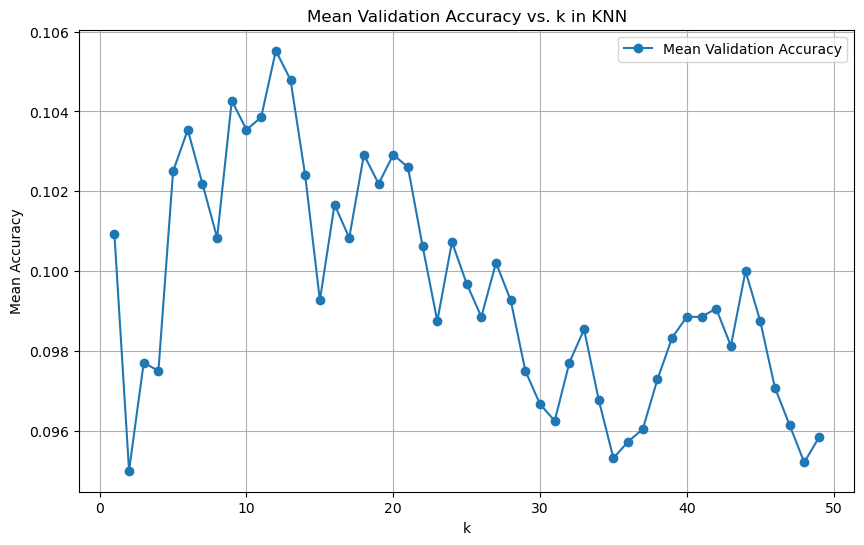

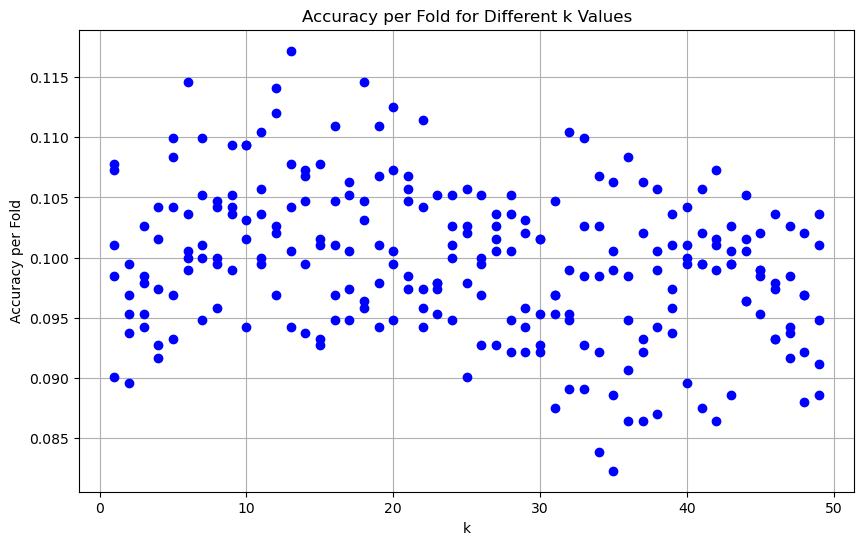

Test accuracy with k=12: 0.0971
Test accuracy with Weighted KNN and k=12: 0.1025


In [54]:
# Importar bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size=0.2, random_state=42)

# Inicializar modelo KNN con valores por defecto (k=5)
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
test_accuracy_default = knn_default.score(X_test, y_test)
print(f"Test accuracy with default KNN (k=5): {test_accuracy_default:.4f}")

# Inicializar variables para almacenar resultados
k_values = range(1, 50)
cv_accuracies = []

# Almacenar precisiones de cada fold para análisis
all_folds_accuracies = {k: [] for k in k_values}
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para distintos valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')
    all_folds_accuracies[k] = fold_accuracies
    cv_accuracies.append(fold_accuracies.mean())

# Encontrar el mejor valor de k (con la mejor precisión promedio)
best_k = k_values[np.argmax(cv_accuracies)]
print(f"Best k: {best_k}")

# Graficar la precisión media en validación cruzada para distintos valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, marker='o', label='Mean Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('Mean Validation Accuracy vs. k in KNN')
plt.legend()
plt.grid(True)
plt.show()

# Graficar precisión por fold para distintos valores de k
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.plot([k] * len(all_folds_accuracies[k]), all_folds_accuracies[k], 'bo', label=f'k={k}' if k == 1 else "")
plt.xlabel('k')
plt.ylabel('Accuracy per Fold')
plt.title('Accuracy per Fold for Different k Values')
plt.grid(True)
plt.show()

# Entrenar modelo con el mejor k y evaluar en el conjunto de prueba
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test accuracy with k={best_k}: {test_accuracy:.4f}")

# Mejorar con KNN Ponderado (Weighted KNN)
weighted_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
weighted_knn.fit(X_train, y_train)
weighted_test_accuracy = weighted_knn.score(X_test, y_test)
print(f"Test accuracy with Weighted KNN and k={best_k}: {weighted_test_accuracy:.4f}")


##### Random Forest

Best Parameters: max_depth=9, n_estimators=50
Best Cross-Validated Accuracy: 0.1052


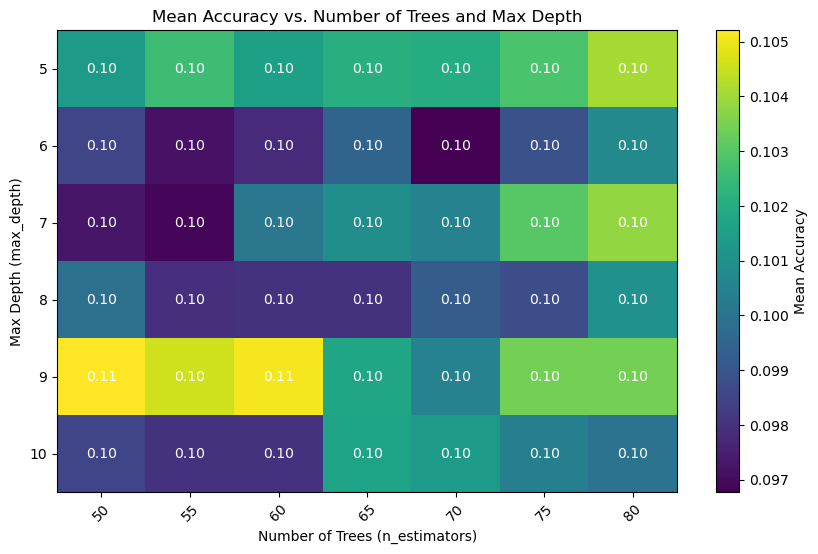

Test accuracy with best parameters: 0.1037


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
# Define the range of values for max_depth and n_estimators
max_depth_values = [5,6,7,8,9,10]
n_estimators_values = [50,55,60,65,70,75,80]

# List to store results and an array to store mean accuracies for visualization
results = []
mean_accuracies = np.zeros((len(max_depth_values), len(n_estimators_values)))
skf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using cross-validation
for i, max_depth in enumerate(max_depth_values):
    for j, n_estimators in enumerate(n_estimators_values):
        # Initialize a RandomForest classifier with given max_depth and n_estimators
        rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        
        # Perform 5-fold cross-validation and compute mean accuracy
        cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=skf, scoring='accuracy')
        mean_accuracy = np.mean(cv_scores)
        
        # Store the mean accuracy in the array for visualization
        mean_accuracies[i, j] = mean_accuracy
        
        # Append the result to the list
        results.append({
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'mean_accuracy': mean_accuracy
        })

# Find the best combination of hyperparameters based on highest accuracy
best_result = max(results, key=lambda x: x['mean_accuracy'])
print(f"Best Parameters: max_depth={best_result['max_depth']}, n_estimators={best_result['n_estimators']}")
print(f"Best Cross-Validated Accuracy: {best_result['mean_accuracy']:.4f}")

plt.figure(figsize=(10, 6))
cax = plt.imshow(mean_accuracies, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar(cax, label='Mean Accuracy')
plt.xticks(np.arange(len(n_estimators_values)), n_estimators_values, rotation=45)
plt.yticks(np.arange(len(max_depth_values)), max_depth_values)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth (max_depth)')
plt.title('Mean Accuracy vs. Number of Trees and Max Depth')

for i in range(len(max_depth_values)):
    for j in range(len(n_estimators_values)):
        plt.text(j, i, f'{mean_accuracies[i, j]:.2f}', ha='center', va='center', color='white', fontsize=10)

plt.grid(False)
plt.show()

# Train the best RandomForest model with optimal parameters
best_rf_clf = RandomForestClassifier(max_depth=best_result['max_depth'], n_estimators=best_result['n_estimators'], random_state=42)
best_rf_clf.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, best_rf_clf.predict(X_test))
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")